In [6]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [15]:
dados = pd.read_csv('C:/Users/dsadm/Desktop/clone/IABD_Inteligencia_Artificial_E_Big_Data/Somativa/dadosacoes.csv')

In [16]:
dados.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


<Axes: xlabel='nome ação', ylabel='valor de mercado R$ -(Bilhões)'>

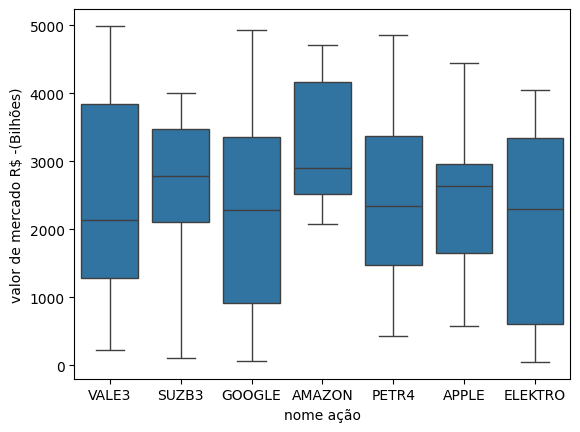

In [18]:
sns.boxplot(x=dados['nome ação'],y=dados['valor de mercado R$ -(Bilhões)'])


In [19]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [20]:
dados.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [21]:
# Realizando o agrupamento com Kmeans
dados_n = pd.get_dummies(dados,columns=['nome ação'],drop_first= True)

In [22]:
features = dados_n[['valor de mercado R$ -(Bilhões)','preço ação R$','qtde cotas']]

In [23]:
kmeans = KMeans(n_clusters=4,random_state=0).fit(features)
dados_n['Cluster'] = kmeans.labels_

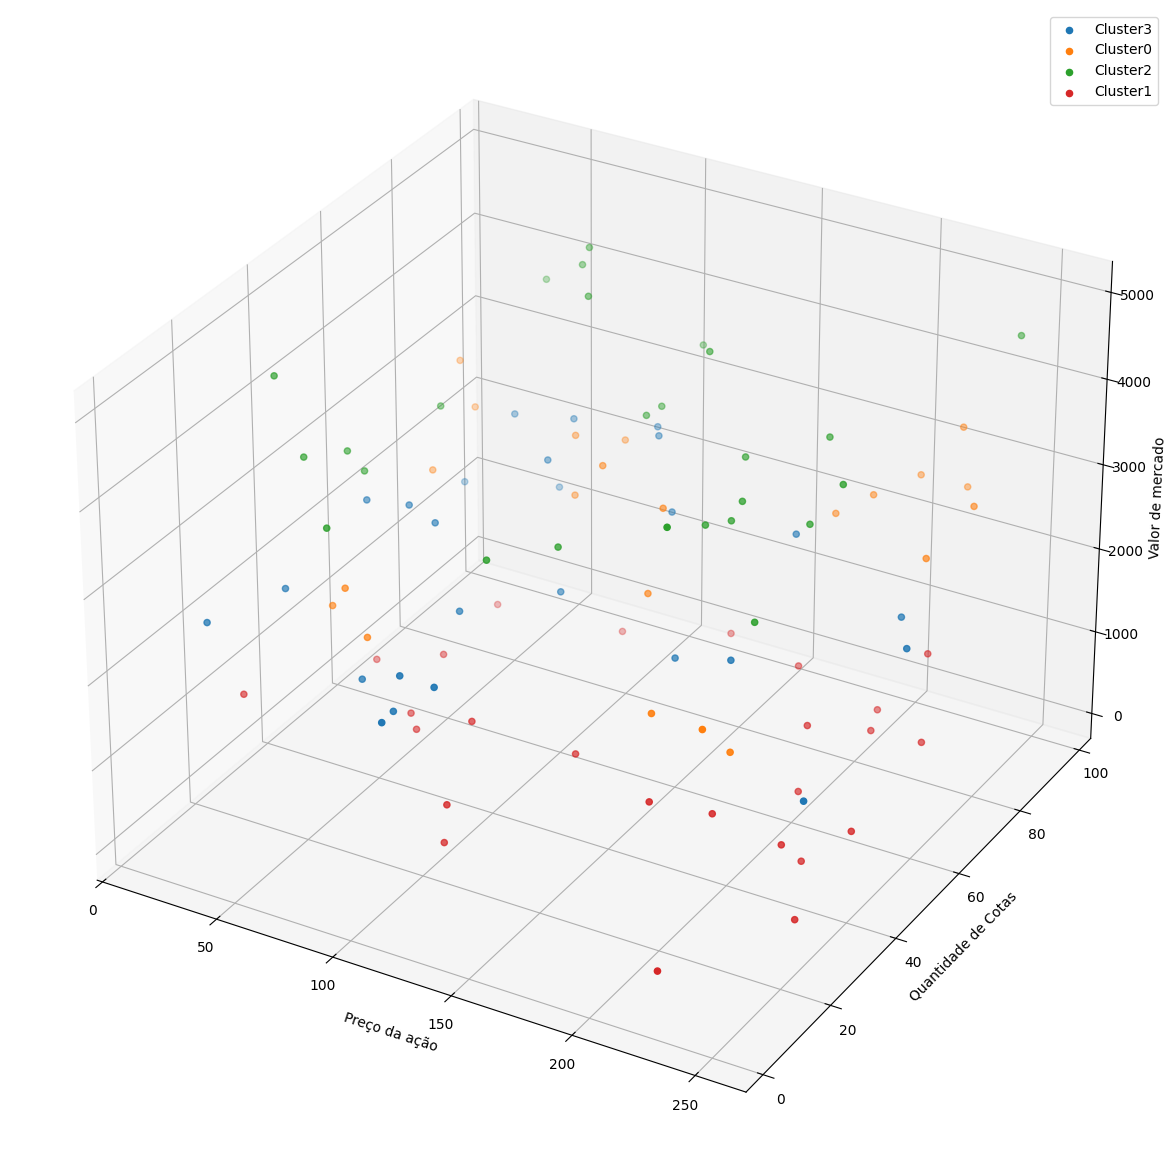

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           153.136364   54.545455                     3020.454545   
1           153.038462   50.307692                      553.961538   
2           139.115385   49.230769                     4167.846154   
3           101.884615   54.346154                     2082.807692   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.181818           0.090909          0.227273   
1               0.038462           0.230769          0.384615   
2               0.076923           0.115385          0.192308   
3               0.192308           0.076923          0.192308   

         nome ação_PETR4  nome ação_SUZB3  nome ação_VALE3  
Cluster                                                     
0               0.090909         0.181818         0.090909  
1    

In [24]:
# Visualizando os grupos no grafico 3d
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection='3d')
for cluster in dados_n['Cluster'].unique():
    cluster_data=dados_n[dados_n['Cluster']==cluster]
    ax.scatter(cluster_data['preço ação R$'],cluster_data['qtde cotas'],
               cluster_data['valor de mercado R$ -(Bilhões)'],
               label=f'Cluster{cluster}')
ax.set_xlabel('Preço da ação')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de mercado')
plt.legend()
plt.show()

# Analisando os clusters
cluster_means = dados_n.groupby('Cluster').mean()
print(cluster_means)